# Part II - Walk Scores, Household Size, and Low and Moderate Income Population Across New York City Boroughs
## by Darcy McCusker

## Investigation Overview

In this study, I investigated the relationships among national walk score index, percent low and moderate income, household size, and borough.


## Dataset Overview and Executive Summary

The dataset focuses only on New York City. The unit of observation in the dataset is one census block. Some of the key findings: 
> 1. The median block in NYC has a walk score of 14, and the distribution of walk scores are approximately normal.
> 2. The median household in NYC has between 2.75 and 3.0 people living in it.
> 3. The Bronx has the highest percentage of low and moderate income residents; Staten Island and Manhattan have the least
> 4. Queens has the largest households, with an average of more than 3 people per household, while Manhattan only has about 2 people per household on average. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Walkability_and_CBDG_eligiblity_by_census_block_merged.csv')

In [3]:
boro_dict = {1 : "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
print(boro_dict)
df['Borough'] = df['BoroID']
df['Borough'].replace(boro_dict,inplace=True)

{1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}


In [4]:
df['HH_Size'] = df['TotPop'] / df['HH']

In [5]:
df.replace(np.inf,8, inplace=True)
col_mean = df['HH_Size'].mean()
df['HH_Size'] = df['HH_Size'].apply(lambda x: col_mean if x > 7 else x)


## Distribution of Walk Scores across all 5 boroughs
This histogram shows the disributuon of walk scores for all five boroughs. The median walk score is between 14 and 14.33. Walk scores are less likely to fall between .33 and .66 for each numeric value, likely due to the way that scores are calculated. The kernel density estimate shows an approximately normal distribution, with a small bump around 5 and a denser left tail. 

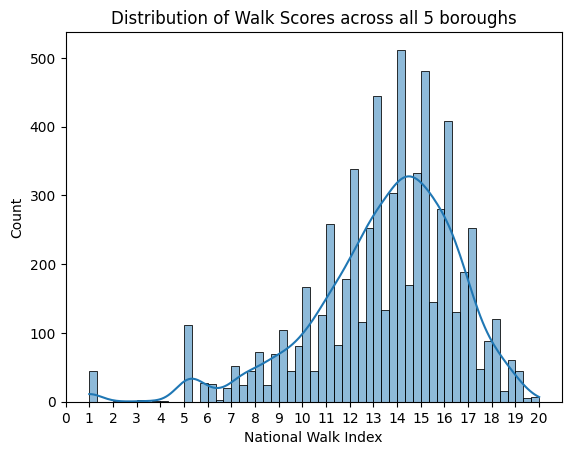

In [12]:
sns.histplot(data=df, x = "NatWalkInd", binwidth = (1/3), kde=True)
plt.xlabel("National Walk Index")
plt.title("Distribution of Walk Scores across all 5 boroughs")
xticks=np.arange(0,21,1)
plt.xticks(xticks);

## Distribution of Household Size across all 5 boroughs
This chart shows a histogram of households sizes across all five boroughs. The shape is bell-shaped but with a longer right tail. There are essentially no blocks with an average household size less than one; most apartments are occupied at any given time by at least one person. Household size reaches a peak between 2.5 and 3, with slightly fewer blocks having an average household size between 2.75 and 3.0. The vast majority of households have between 1.5 and 4.0 people living in them.



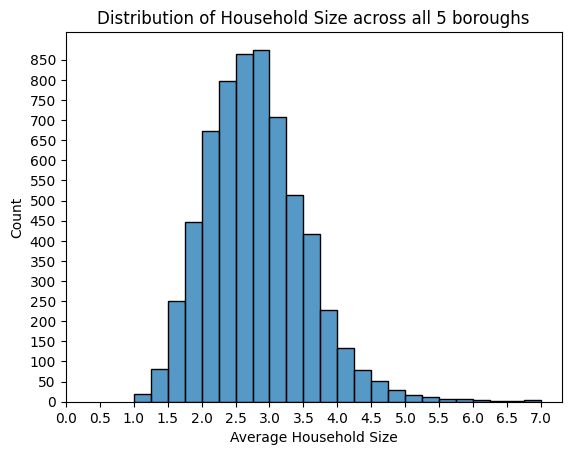

In [43]:
sns.histplot(data=df,x="HH_Size",binwidth = .25)
plt.xlabel("Average Household Size")
plt.title("Distribution of Household Size across all 5 boroughs")
xticks=np.arange(0,7.5,.5)
plt.xticks(xticks)
yticks = np.arange(0,900,50)
plt.yticks(yticks);

## Distribution of Low/Moderate Income percent by Borough
These three charts show how the distribution of low and moderate income blocks differ by boroughs. Each chart highlights a different aspects of the distribution. From the first graph, it is clear that the Bronx has the highest rate of low and moderate income residents, while Staten Island and Manhattan have the lowest. However, that insight doesn't tell the whole story. Staten Island has a much smaller range of values than Manhattan as shown in the second figure. In the third, we can see why: Manhattan has a large number of blocks with approximately 20% low/moderate income residents and another large number of blocks around 80%. From both the box and violin chart, it's easy to see why The Bronx has the highest level overall: both charts show its distribution has the highest center of all boroughs. 


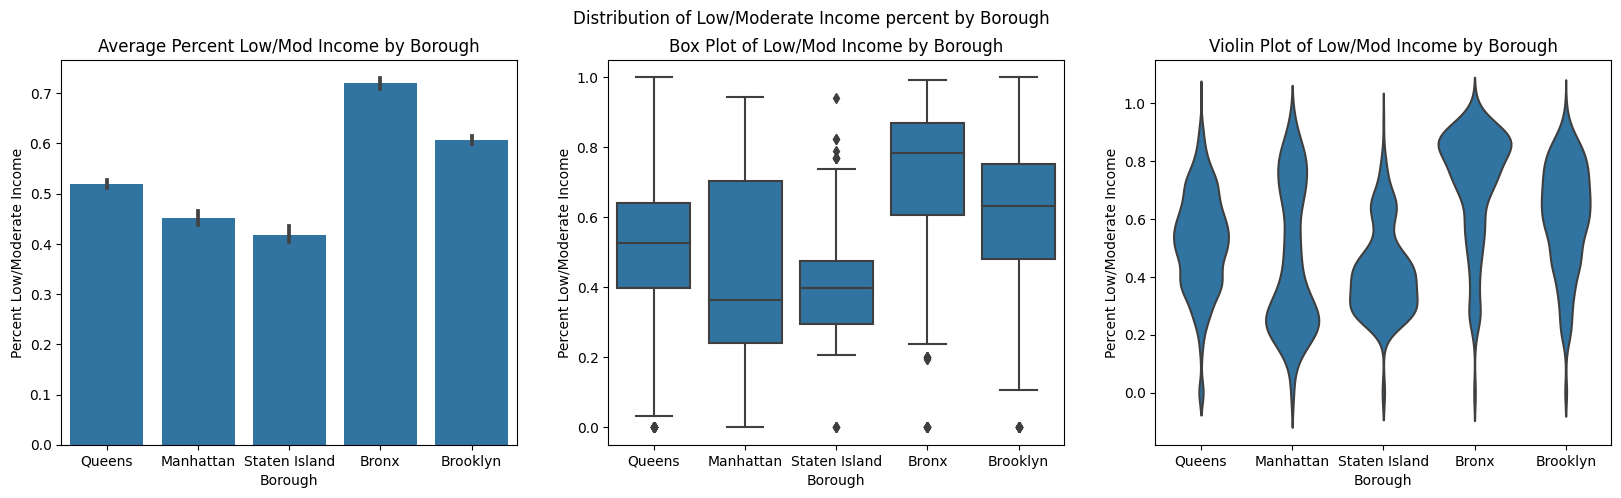

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

plt.suptitle("Distribution of Low/Moderate Income percent by Borough")
sns.barplot(data=df, x='Borough', y='LowMod_Pct', color='tab:blue', ax=ax[0])
ax[0].set_title("Average Percent Low/Mod Income by Borough")
ax[0].set_ylabel("Percent Low/Moderate Income");


sns.boxplot(data=df,x='Borough', y='LowMod_Pct', color='tab:blue', ax=ax[1]);
ax[1].set_title("Box Plot of Low/Mod Income by Borough")
ax[1].set_ylabel("Percent Low/Moderate Income");

sns.violinplot(data=df, x='Borough', y='LowMod_Pct', inner=None, color='tab:blue', ax=ax[2]);
ax[2].set_title("Violin Plot of Low/Mod Income by Borough")
ax[2].set_ylabel("Percent Low/Moderate Income");

## Average Household Size by Borough
This chart shows how average household size differs across the five boroughs. Queens clearly has the highest household size, slighly above 3, while Manhattan has the lowest at about 2.2. Staten Island, The Bronx, and Brooklyn all have approximately the same household size around 2.8. 

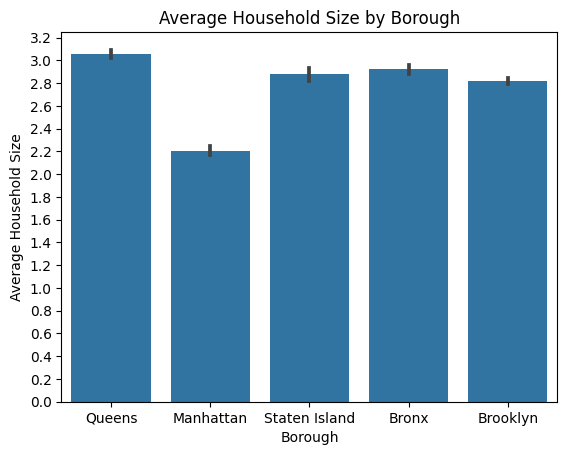

In [39]:
sns.barplot(df,x="Borough",y="HH_Size",color='tab:blue')
plt.title("Average Household Size by Borough")
yticks = np.arange(0,3.4,.2)
plt.yticks(yticks)
plt.ylabel("Average Household Size");